In [51]:
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
frame = pd.read_csv("rq1&2.csv")

'''
    Reads json result from logs folder
'''
def fill_data(frame, folder="logs"):
    import os
    import json
    ff1 = []
    ff2 = []
    
    for parent, p, files in os.walk(folder):
        for f in files:
            if f.endswith("reward.json"):
                ff2.append(f"{parent}/{f}")
            elif f.endswith("json"):
                ff1.append(f"{parent}/{f}")
                
    # read and filter ff1
    successff1 = {}
    for f in ff1:
        print(f)
        data = open(f, 'r').read()
        data = json.loads(data)
        name = f.split("/")[1].split(".")[0]
        if data['pending'][-1] == 0:
            # This was a successfull breaking
            if name not in successff1:
                successff1[name] = []
            successff1[name].append((len(data['current']), data['acceptances'][-1] + data['rejections'][-1]))
    
    for k, values in successff1.items():
        mn = sorted(values, key = lambda x: x[0])[0]
        name = k[:8]
        frame[frame['hash'] == name]['stacked_mutationsff1'] = mn[0]
        frame[frame['hash'] == name]['oracle_callsff1'] = mn[1]
        
    successff2 = {}
    for f in ff2:
        print(f)
        data = open(f, 'r').read()
        data = json.loads(data)
        name = f.split("/")[1].split(".")[0]
        if data['pending'][-1] == 0:
            # This was a successfull breaking
            if name not in successff2:
                successff2[name] = []
            successff2[name].append((len(data['current']), data['acceptances'][-1] + data['rejections'][-1]))
    
    for k, values in successff2.items():
        mn = sorted(values, key = lambda x: x[0])[0]
        name = k[:8]
        frame[frame['hash'] == name]['stacked_mutationsff2'] = mn[0]
        frame[frame['hash'] == name]['oracle_callsff2'] = mn[1]

    print(successff1)
                

fill_data(frame)

logs/9d30e7f065cd00a47d8e10e27acc443a33977176484ca11077f08fc20b1a672c.wasm.0.3.reward-mutate-33-5n5wt-1715621019.data.json
logs/fb15929fb454d62f2dbabb306d9b73b3b1fe4526e6b4a76a7a23519273c6c519.wasm.0.01.reward-mutate-33-5n5wt-2426342253.data.json
logs/fb15929fb454d62f2dbabb306d9b73b3b1fe4526e6b4a76a7a23519273c6c519.wasm.0.3.reward-mutate-33-5n5wt-1688274112.data.json
logs/a27b45ef89b961b8c8ff78b6ab580ce0d866647c3ae03c4ab0f37ba15c433f8f.wasm.1.1.reward-mutate-33-5n5wt-650659601.data.json
logs/9d30e7f065cd00a47d8e10e27acc443a33977176484ca11077f08fc20b1a672c.wasm.0.3.reward-mutate-33-5n5wt-4064781869.data.json
logs/d2141ff28b1c81a90177319d3f4ddc17ab5c493d165be73a4af7256474a4ed58.wasm.0.3.reward-mutate-33-5n5wt-3370323599.data.json
logs/d2141ff28b1c81a90177319d3f4ddc17ab5c493d165be73a4af7256474a4ed58.wasm.0.3.reward-mutate-33-5n5wt-1223332820.data.json
logs/9d30e7f065cd00a47d8e10e27acc443a33977176484ca11077f08fc20b1a672c.wasm.0.01.reward-mutate-33-5n5wt-3119595281.data.json
logs/4cbdbbb1bc

/var/folders/gq/b9tbk2vx1qg57m7c4rkrdzv40000gn/T/ipykernel_94991/3685270301.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[frame['hash'] == name]['stacked_mutationsff1'] = mn[0]
/var/folders/gq/b9tbk2vx1qg57m7c4rkrdzv40000gn/T/ipykernel_94991/3685270301.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[frame['hash'] == name]['oracle_callsff1'] = mn[1]


IndexError: list index out of range

In [56]:
display(frame)

,hash,detectors,max_evaded_baseline,mean_trans,max_evaded_ff1,oracle_callsff1,stacked_mutationsff1,max_evaded_ff2,oracle_callsff2,stacked_mutationsff2
0,47d29959,31,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9d30e7f0,30,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8ebf4e44,26,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dc11d82d,20,20,355.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0d996462,19,19,401.0,NaN,NaN,NaN,NaN,NaN,NaN
5,a32a6f4b,18,18,635.0,NaN,NaN,NaN,NaN,NaN,NaN
6,fbdd1efa,18,18,310.0,NaN,NaN,NaN,NaN,NaN,NaN
7,d2141ff2,9,9,461.0,NaN,NaN,NaN,NaN,NaN,NaN
8,aafff587,6,6,484.0,NaN,NaN,NaN,NaN,NaN,NaN
9,046dc081,6,6,404.0,NaN,NaN,NaN,NaN,NaN,NaN


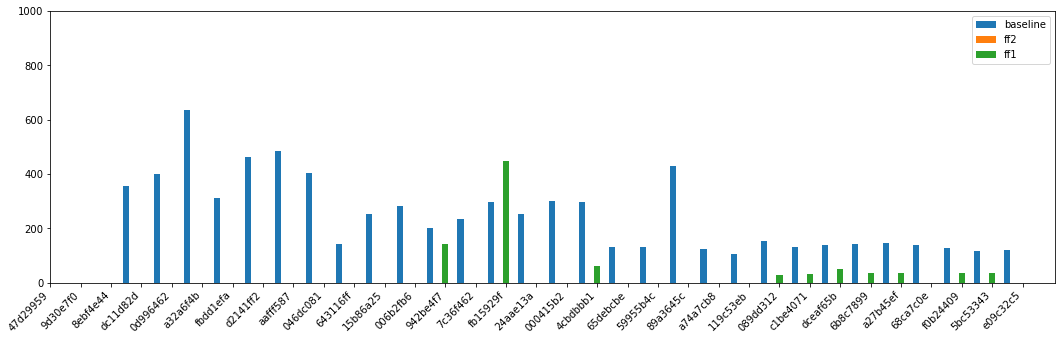

In [59]:
plt.rcParams['figure.figsize'] = [18, 5]

plt.bar(
    [4*x for x in range(len(frame))],
    height=frame['mean_trans'].values,
    label="baseline"
)
plt.bar(
    [4*x+1 for x in range(len(frame))],
    height=frame['stacked_mutationsff2'].values,
    label="ff2"
)
plt.bar(
    [4*x+2 for x in range(len(frame))],
    height=frame['stacked_mutationsff1'].values,
    label="ff1"
)
plt.xticks(
    [4*x +2 for x in range(len(frame))],
    frame['hash'].values,
    rotation=45,
    ha='right'
)
plt.ylim(0, 1000)
plt.legend()